## UCI/Kaggle Machine Learning Repository Dataset - Diabetes
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

<b>About this file</b>

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

________________________
<b>Pregnancies</b> - 
Number of times pregnant

<b>Glucose</b> -
Plasma glucose concentration a 2 hours in an oral glucose tolerance test

<b>BloodPressure</b> -
Diastolic blood pressure (mm Hg)

<b>SkinThickness</b> - 
Triceps skin fold thickness (mm)

<b>Insulin</b> - 
2-Hour serum insulin (mu U/ml)

<b>BMI</b> - 
Body mass index (weight in kg/(height in m)^2)

<b>DiabetesPedigreeFunction</b> - 
Diabetes pedigree function

<b>Age</b> - 
Age (years)
_________________

In [12]:
import pandas as pd      
import matplotlib as mat
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np    
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error            
%matplotlib inline             

In [13]:
# Loading the dataset
df = pd.read_csv("pima-data.csv")  
df.shape 

(768, 10)

In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [15]:
# Null values
df.isna().sum().sort_values(ascending = False)

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [16]:
# But we have some data that are not null, but they are zero.
for column in df.columns[:9]:
    print(f'Missing lines in {column}: {len(df.loc[df[column] == 0])}')

Missing lines in num_preg: 111
Missing lines in glucose_conc: 5
Missing lines in diastolic_bp: 35
Missing lines in thickness: 227
Missing lines in insulin: 374
Missing lines in bmi: 11
Missing lines in diab_pred: 0
Missing lines in age: 0
Missing lines in skin: 227


In [17]:
# The zeros were replaced by the mean
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values = 0, strategy = "mean")
df.iloc[:,:9] = fill_0.fit_transform(df.iloc[:,:9])


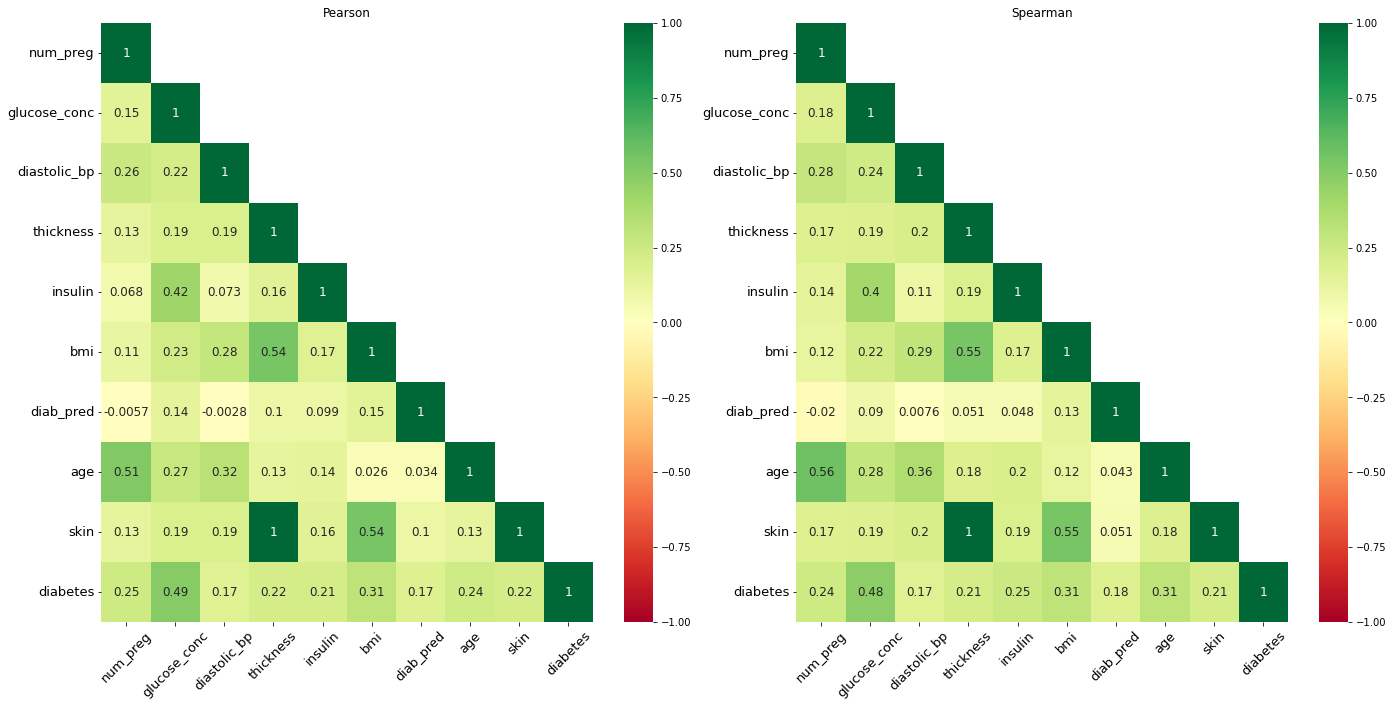

In [18]:
# Pearson and Spearman Correlation

fig, ax = plt.subplots(1, 2, figsize=(20,10), sharey=False)
fig.tight_layout(pad=5)
y  = 0

for name in ['Pearson', 'Spearman']:
    if name == 'Pearson': 
        corr = df.corr() 
    else: 
        corr = df.corr(method = 'spearman')
    matrix = np.triu(corr)
    np.fill_diagonal(matrix, False)

    heat_1 = sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, annot = True, mask = matrix,annot_kws={'size':12}, ax = ax[y]);
    ax[y].set(title=name)

    heat_1.set_xticklabels(heat_1.get_xmajorticklabels(), fontsize = 13);
    heat_1.set_yticklabels(heat_1.get_ymajorticklabels(), fontsize = 13);
    heat_1.tick_params(axis='x', rotation=45)
    y += 1


In [19]:
# Changing strings to numerical values
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.378000,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,1.142600,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.148643,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.906200,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.379000,1


In [20]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Positive diabetes : {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Negative diabetes : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Positive diabetes : 268 (34.90%)
Negative diabetes : 500 (65.10%)


___________
#### Splitting
____________
train data - 70% / test data - 30% 

In [21]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [183]:
# Feature Selection
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [184]:
# Objects
X = df[atributos]
Y = df['diabetes']

In [185]:
# Split size
split_test_size = 0.30

In [186]:
# Generating train and test data
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 10)

In [187]:
print("{0:0.2f}% in train data".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% in test data".format((len(X_teste)/len(df.index)) * 100))

69.92% in train data
30.08% in test data


____________
#### Verifying the split
___________

In [188]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 181 (33.71%)
Training False : 356 (66.29%)

Test True : 87 (37.66%)
Test False : 144 (62.34%)


____________
#### Naive Bayes Model
_____________

In [189]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Creating the model
modelo_v1 = GaussianNB()
# Training the model
modelo_v1.fit(X_treino, Y_treino)

GaussianNB()

In [190]:
from sklearn import metrics
y_pred_nb = modelo_v1.predict(X_teste)

In [191]:
# Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, y_pred_nb, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, y_pred_nb, labels = [1, 0]))

Confusion Matrix
[[ 47  40]
 [ 22 122]]

Classification Report
              precision    recall  f1-score   support

           1       0.68      0.54      0.60        87
           0       0.75      0.85      0.80       144

    accuracy                           0.73       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.73      0.72       231



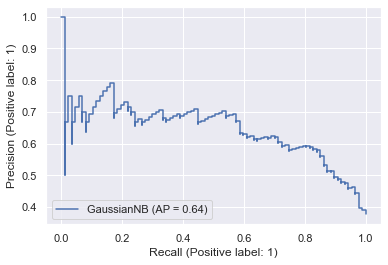

In [192]:
sns.set_theme(style='darkgrid')
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(estimator=modelo_v1, X=X_teste, y=Y_teste, pos_label=1);

___________________
#### Logistic Regression
_________________

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
modelo_v2 = LogisticRegression( random_state = 42, max_iter = 1000)
modelo_v2.fit(X_treino, Y_treino)
y_pred_lr = modelo_v2.predict(X_teste)

In [195]:
proba_1 = modelo_v2.predict_proba(X_teste)[:, 1]

cutoff = 0.5
y_pred = np.where(proba_1 >= cutoff, 1, 0)

In [196]:
print("Classification Report")
print(metrics.classification_report(Y_teste, y_pred, labels = [1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.70      0.52      0.60        87
           0       0.75      0.87      0.80       144

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



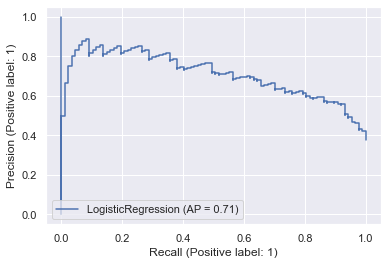

In [197]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(estimator=modelo_v2, X=X_teste, y=Y_teste, pos_label=1);

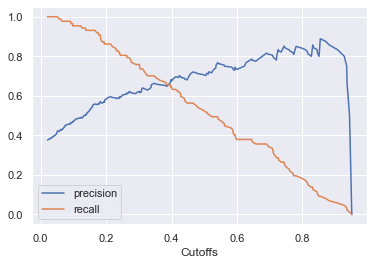

In [198]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, cutoffs= precision_recall_curve(Y_teste, proba_1)

plt.plot(cutoffs, precisions[:-1], label='precision')
plt.plot(cutoffs, recalls[:-1], label='recall')

plt.legend()
plt.xlabel('Cutoffs');

In [199]:
# Changing the cutoff

cutoff = 0.25
y_pred = np.where(proba_1 >= cutoff, 1, 0)
print("Classification Report")
print(metrics.classification_report(Y_teste, y_pred, labels = [1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.80      0.69        87
           0       0.85      0.69      0.76       144

    accuracy                           0.73       231
   macro avg       0.73      0.75      0.73       231
weighted avg       0.76      0.73      0.74       231



In [200]:
# As the data is imbalanced and a false negative is more harmful than a false positive (as a healthy person would be accused of having diabetes), 
# the model Logistic Regression with a lower cutoff was chosen based on the recall.

# Naive Bayes         = 0.54
# Logistic Regression = 0.52 - cutoff 0.5
# Logistic Regression = 0.80 - cutoff 0.25

________
#### Errors
______


In [201]:
correlacoes_ordenadas = pd.concat([X_treino, Y_treino], axis=1).corr()['diabetes'].abs().sort_values(ascending=False)
features_ordenadas = correlacoes_ordenadas.index[1:]
qtde_features = len(features_ordenadas)

In [202]:
# Function to measure train and test errors
def treino_avaliacao_test(X_train, y_train, X_test, y_test, estimador):
    estimador.fit(X_train, y_train)

    y_pred_train = estimador.predict(X_train)
    erro_train = mean_absolute_error(y_train, y_pred_train)
    
    y_pred_test = estimador.predict(X_test)
    erro_test = mean_absolute_error(y_test, y_pred_test)
    
    return erro_train, erro_test

In [203]:
resultados_treinos_nb = []

for i in range(1, qtde_features+1):
    resultados_treinos_nb.append(
        treino_avaliacao_test(
            X_treino[features_ordenadas[:i]],
            Y_treino,
            X_teste[features_ordenadas[:i]],
            Y_teste,
            GaussianNB()
        )
    )

df_resultados_treinos_nb = pd.DataFrame(resultados_treinos_nb, columns=['erro_train', 'erro_test'])

In [204]:
resultados_treinos = []

for i in range(1, qtde_features+1):
    resultados_treinos.append(
        treino_avaliacao_test(
            X_treino[features_ordenadas[:i]],
            Y_treino,
            X_teste[features_ordenadas[:i]],
            Y_teste,
            LogisticRegression(random_state = 42, max_iter = 1000)
        )
    )

df_resultados_treinos = pd.DataFrame(resultados_treinos, columns=['erro_train', 'erro_test'])

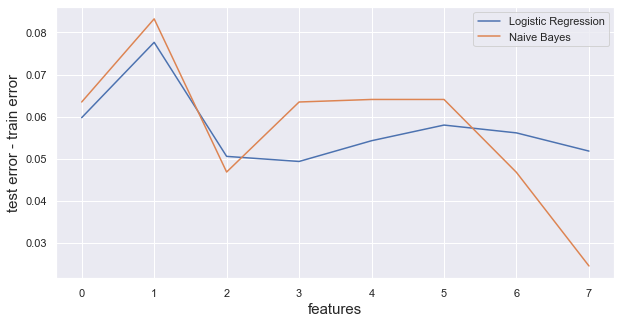

In [205]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.xticks(df_resultados_treinos.index)
fig_2 = sns.lineplot(data=df_resultados_treinos['erro_test'] - df_resultados_treinos['erro_train'], label = 'Logistic Regression')
fig_1 = sns.lineplot(data=df_resultados_treinos_nb['erro_test'] - df_resultados_treinos_nb['erro_train'], label = 'Naive Bayes')


fig_2.set_ylabel('test error - train error', fontsize = 15)
fig_2.set_xlabel('features', fontsize = 15)
plt.legend();


____________
#### Making Predictions With the Trained Model
_____________

In [210]:
import pickle
# Saving the model
filename = 'trained_model_v3.sav'
pickle.dump(modelo_v2, open(filename, 'wb'))

In [211]:
X_teste

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
568,4.000000,154.0,72.0,29.00000,126.000000,31.3,0.338,37.0
620,2.000000,112.0,86.0,42.00000,160.000000,38.4,0.246,28.0
456,1.000000,135.0,54.0,29.15342,155.548223,26.7,0.687,62.0
197,3.000000,107.0,62.0,13.00000,48.000000,22.9,0.678,23.0
714,3.000000,102.0,74.0,29.15342,155.548223,29.5,0.121,32.0
...,...,...,...,...,...,...,...,...
345,8.000000,126.0,88.0,36.00000,108.000000,38.5,0.349,49.0
408,8.000000,197.0,74.0,29.15342,155.548223,25.9,1.191,39.0
304,3.000000,150.0,76.0,29.15342,155.548223,21.0,0.207,37.0
686,3.000000,130.0,64.0,29.15342,155.548223,23.1,0.314,22.0


In [271]:
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[:1])
resultado2 = loaded_model.predict(X_teste[1:2])
print(resultado1)
print(resultado2)


[1]
[0]
